In [14]:
import uproot
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#list of root files to be used as input, with ROC curves inside
files_list = ["TMVA_mN1p25_ctau1000.root","TMVA_mN1p25_ctau100.root","TMVA_mN1p25_ctau10.root"]

In [4]:
#list of booked methods found inside root files
methods_list = ["BDT","Fisher","PyKeras"]

In [23]:
rocs = {method:{} for method in methods_list+["x_values"]}
for file_name in files_list:
    print(f"Processing {file_name}")
    #read root file with uproot
    file = uproot.open(file_name)

    #seaborn esthetics
    sns.set_style("darkgrid")
    sns.set_context("paper")
    #extract mass and ctau from file name
    mass = re.findall(r"mN(\d)p(\d+)",file_name)[0]
    mass_label = f"m_N = {mass[0]}.{mass[1]}"
    ctau = re.findall(r"ctau(\d+)",file_name)[0]
    ctau_label = f"c$\\tau$ = {ctau} mm"
    full_label = f"{mass_label}, {ctau_label}"

    #rocs is a dictionary of dictionaries, with the first key being the method name
    #and the second the full_label (mass and ctau)
    
    for method in methods_list:
        #go to dataset/Method_{method}/{method}/MVA_{method}_trainingRejBvsS inside root file to extract ROC curve
        roc = file[f"dataset/Method_{method}/{method}/MVA_{method}_trainingRejBvsS"]
        bin_edges = roc.axis().edges()
        #turn bin edges into bin centers, x_values
        x_values = (bin_edges[1:] + bin_edges[:-1])/2
        y_values = roc.values()
        #append y_values to rocs dictionary
        rocs[method][full_label] = y_values
        rocs["x_values"][full_label] = x_values
    
    #make pd dataframe out of rocs
    df = pd.DataFrame(rocs)

Processing TMVA_mN1p25_ctau1000.root
Processing TMVA_mN1p25_ctau100.root
Processing TMVA_mN1p25_ctau10.root


In [24]:
df

,BDT,Fisher,PyKeras,x_values
"m_N = 1.25, c$\tau$ = 1000 mm","[1.0, 1.0, 0.9999998627073999, 0.9999998627073...","[0.999992980370272, 0.999992980370272, 0.99999...","[0.999789988423518, 0.9997899473652796, 0.9997...","[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0..."
"m_N = 1.25, c$\tau$ = 100 mm","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 0.9999969437499477, 0.9999969437499477, ...","[0.9999963402048886, 0.9999937551646584, 0.999...","[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0..."
"m_N = 1.25, c$\tau$ = 10 mm","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9999998624984195, 0.9999997239717399, 0.999...","[0.9999877133823913, 0.9999877133823913, 0.999...","[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0..."


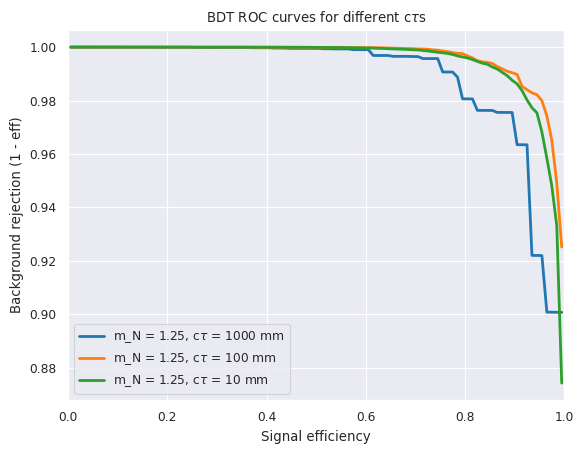

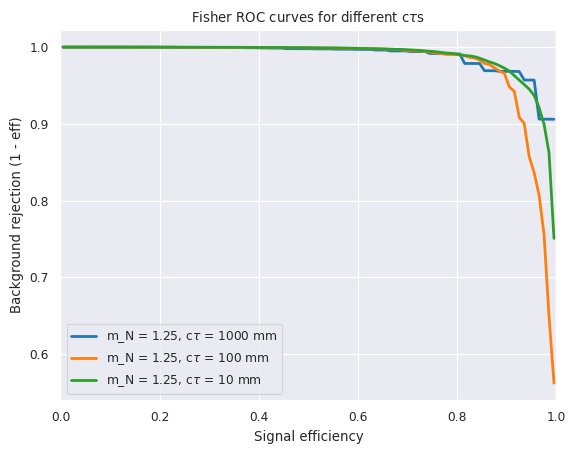

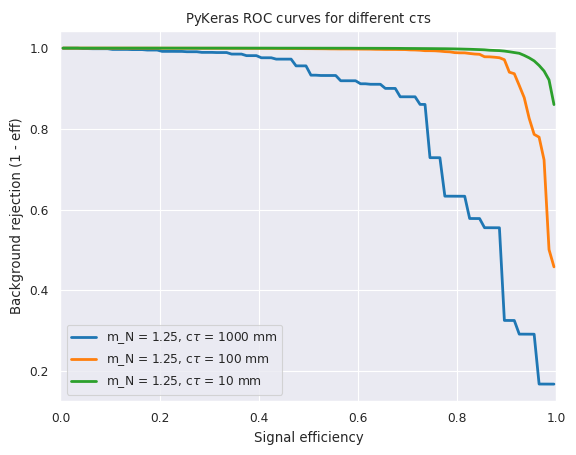

In [36]:
for method in methods_list:

    # Loop over each row in the dataframe
    for index, row in df.iterrows():
        # Plot the BDT values against the x_values
        sns.lineplot(x=row['x_values'], y=row[method], label=f'{index}',linewidth=2)
        
    # Set the title and axis labels
    plt.title(f'{method} ROC curves for different c$\\tau$s')
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection (1 - eff)')

    # Show the legend
    plt.legend()

    #set x -limits to 0-1
    plt.xlim(0,1)

    # Show the plot
    plt.show()